## Plotting a range of PDFs vertical distributions of eatin gand precip from TRBELT simulations

In [297]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd

import os
import glob as gb

In [345]:
dir_trbelt = '/glade/campaign/cgd/amp/brianpm/trbelt_remap2/'

trbelt_cases = ['trbelt','control','smalldt']
trbelt_runs = ['F2000climo.ne0np4.trbelta.ne30x8_g17.intel.chey.nuopc.cesm23alpha09d.009b',
               'e2p3b09.F2000climo.ne30pg3.ctl002',
               'e2p3b09.F2000climo.ne30pg3.smalldt02']
 
lat_lims = [-30,30]
    
period = '000?-01' ; period_name = 'January'
#period = '000?-07' ; period_name = 'July'
#period = '000?-04' ; period_name = 'April'

channel = 'h0'

var_3d = 'DTCOND'  ;  v3d_units = 'K/day' ; v3d_scale = 86400. ; clev_scale = [1.5,0.4,0.4] ; clev_offset = [0.,0.,0.] ; cont_cbar = ['RdBu_r','RdBu_r','RdBu_r']
#var_3d = 'RELHUM'  ;  v3d_units = '%'     ; v3d_scale = 1. ; clev_scale = [5.,3,3] ; clev_offset = [10.,0.,0.] ; cont_cbar = ['Purples','PuOr_r','PuOr_r']

var_2d = 'PRECT'   ;  v2d_units = 'mm/day' ; v2d_scale = 86400.*1000.
#var_2d = 'PRECC'   ;  v2d_units = 'mm/day' ; v2d_scale = 86400.*1000.


---- CASE = trbelt ----
First = /glade/campaign/cgd/amp/brianpm/trbelt_remap2/trbelt/F2000climo.ne0np4.trbelta.ne30x8_g17.intel.chey.nuopc.cesm23alpha09d.009b.cam.h0.0003-01.nc
Last  = /glade/campaign/cgd/amp/brianpm/trbelt_remap2/trbelt/F2000climo.ne0np4.trbelta.ne30x8_g17.intel.chey.nuopc.cesm23alpha09d.009b.cam.h0.0008-01.nc
ibin,binmin,binmax ==  0 0.0 0.01
ibin,binmin,binmax ==  1 0.01 0.1
ibin,binmin,binmax ==  2 0.1 1
ibin,binmin,binmax ==  3 1 2
ibin,binmin,binmax ==  4 2 3
ibin,binmin,binmax ==  5 3 4
ibin,binmin,binmax ==  6 4 5
ibin,binmin,binmax ==  7 5 6
ibin,binmin,binmax ==  8 6 7
ibin,binmin,binmax ==  9 7 8
ibin,binmin,binmax ==  10 8 9
ibin,binmin,binmax ==  11 9 10
ibin,binmin,binmax ==  12 10 11
ibin,binmin,binmax ==  13 11 12
ibin,binmin,binmax ==  14 12 13
ibin,binmin,binmax ==  15 13 14
ibin,binmin,binmax ==  16 14 15
ibin,binmin,binmax ==  17 15 20
ibin,binmin,binmax ==  18 20 25
ibin,binmin,binmax ==  19 25 30

---- CASE = control ----
First = /glade/campaign/

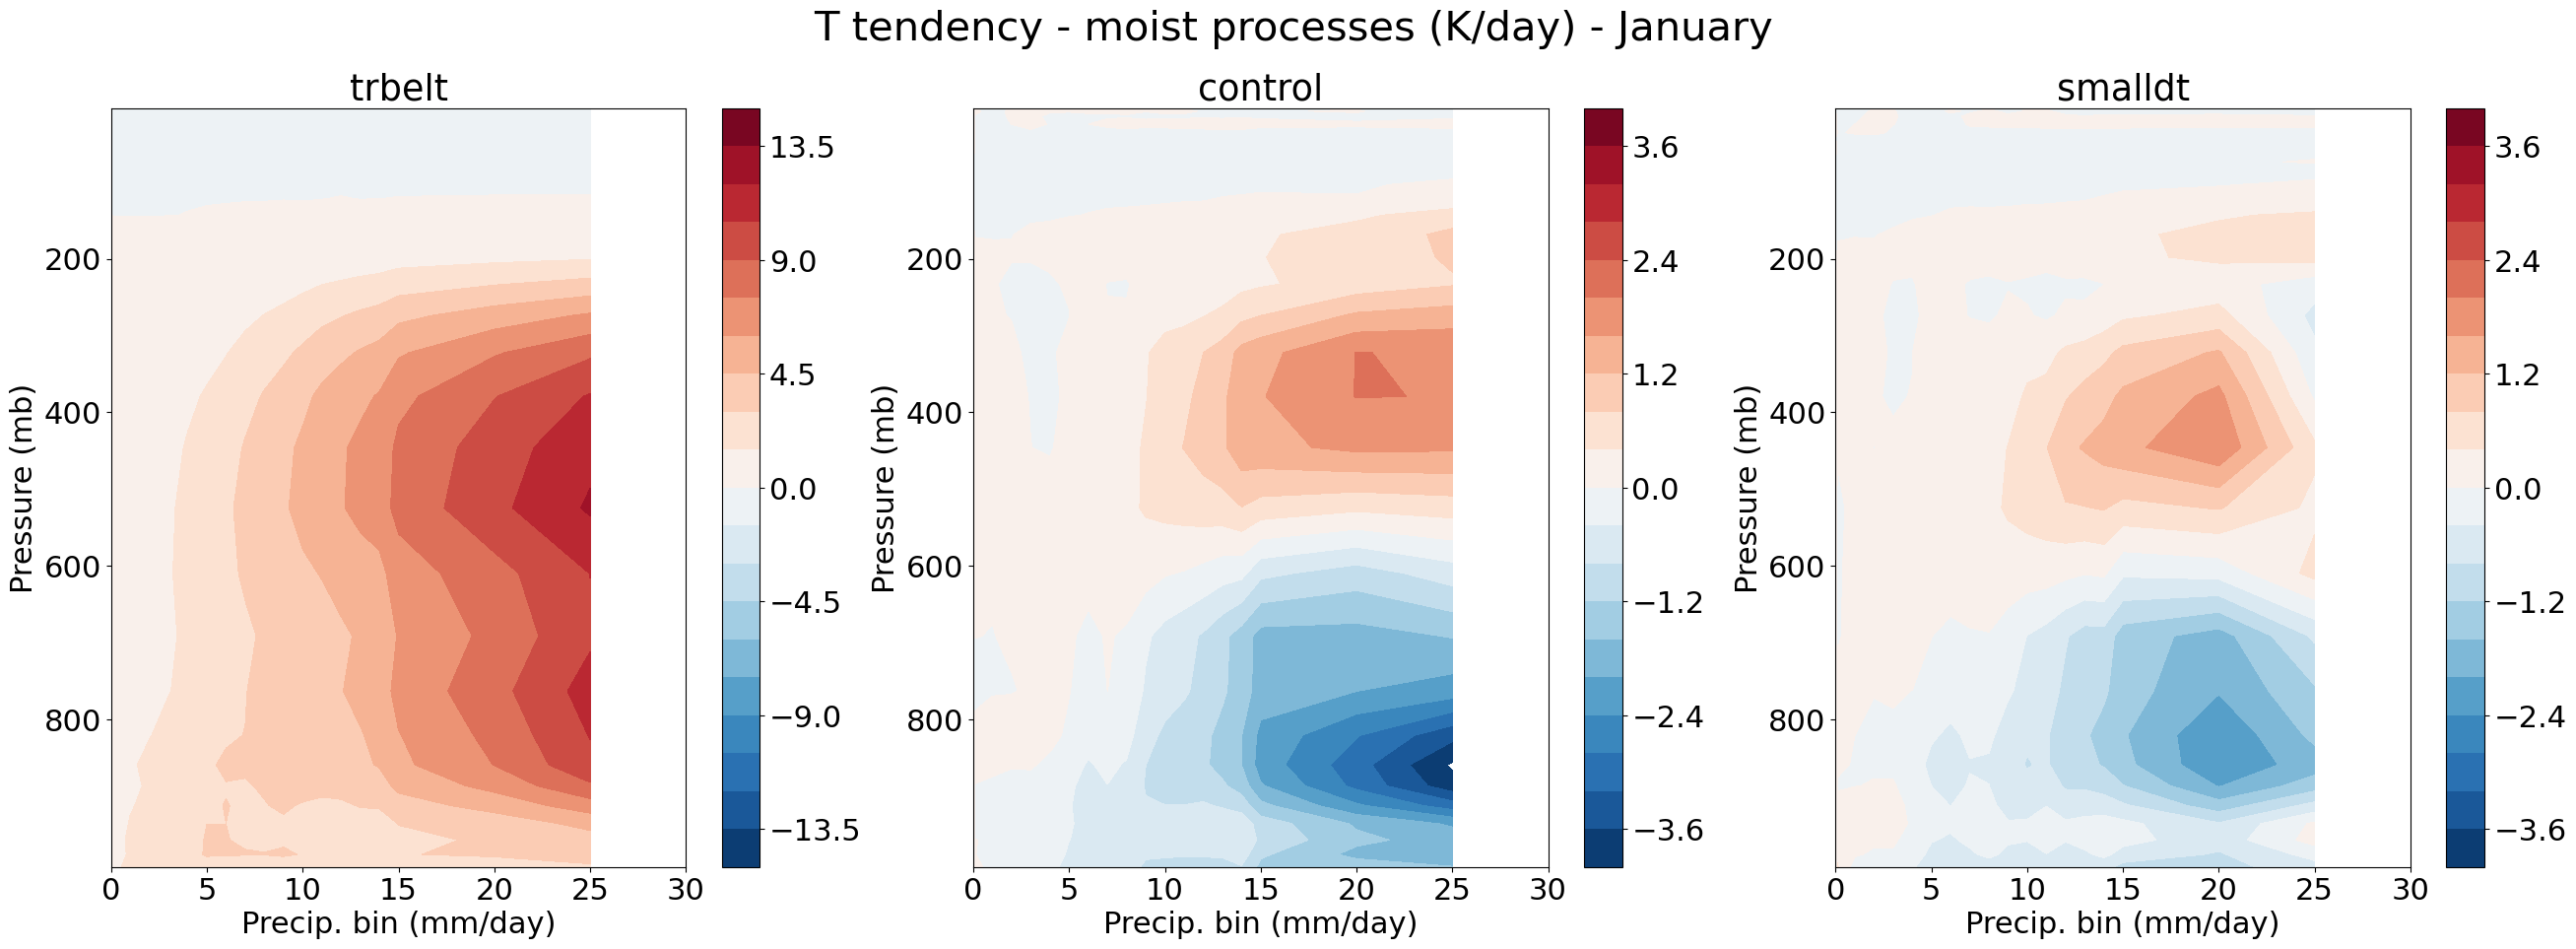

In [346]:





# Set up figure variables 
ncases = len(trbelt_cases)
plt1, ax1 = mp.subplots(1, ncases, figsize=(32,10))

#bins_x = [0.01,0.1,1,2,3,4,5,10,15,20,25,30,34,40,45,50]
bins_x = [0.,0.01,0.1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30]
clevels0 = [-10.,-9.,-8.,-7.,-6.,-5.,-4.,-3.,-2.,-1.,0.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]




yname = 'Pressure (mb)'




# Loop cases

for it,trun in enumerate(trbelt_runs):
    
    dir_trbelt_it = dir_trbelt+trbelt_cases[it]+'/'
    print('')
    print('---- CASE = '+trbelt_cases[it]+ ' ----')
    
    fhist_h = sorted(gb.glob(dir_trbelt_it+trun+'.cam.'+channel+'.'+period+'*nc'))
    print('First = '+fhist_h[0])
    print('Last  = '+fhist_h[-1])
    
    run_path = dir_trbelt_it+trun+'.cam.h0.'+yr_mn+'.nc'
    ds_case = xr.open_mfdataset(fhist_h)   
    da_case = ds_case.sel(lat=slice(lat_lims[0],lat_lims[1]))
    
    da_3d_var = ds_case[var_3d]
    
    if var_2d == 'PRECT':
        da_2d_var = ds_case['PRECC']+ds_case['PRECL'] ; xname = 'Precip. bin (mm/day)'
    else:
        da_2d_var = ds_case[var_2d] ; xname = '2D Variable'
    
    
    da_2d_var = da_2d_var*v2d_scale
    da_3d_var = da_3d_var*v3d_scale
    
    # New plot array creation (with zeros)
    xy_cond = xr.zeros_like(da_2d_var)
    xyp_cond = xr.zeros_like(da_3d_var)
   
    # Set up plot array
    coords = {'lev':da_3d_var.lev.values,'bin':bins_x}
    da_plot_var = xr.DataArray(data=np.full((len(da_3d_var.lev.values),len(bins_x)),np.nan),coords=coords,dims=['lev','bin']) 

    # Unroll input array
    da_3d_var_timelatlon = da_3d_var.stack(time_lat_lon=("time", "lat", "lon"))  
 
  
    # Loop bins to construct averaged profile
    for ix in range(0,len(bins_x[:-1])):
        print('ibin,binmin,binmax == ',ix,bins_x[ix],bins_x[ix+1])
      
        xy_cond.values = np.logical_and(da_2d_var>=bins_x[ix], da_2d_var<bins_x[ix+1])
        xy_cond_timelatlon = xy_cond.stack(time_lat_lon=("time", "lat", "lon")) # Flatten to 1D array
        
        da_plot_var[:,ix] = da_3d_var_timelatlon[:,xy_cond_timelatlon].mean(dim=["time_lat_lon"])
      
    
    if it == 0: da_plot_save = da_plot_var
    if it > 0 : da_plot_var = da_plot_var-da_plot_save
    
    
    clevels = [x+clev_offset[it] for x in clevels0]
    clevels = [x*clev_scale[it] for x in clevels]
    
    plt1 = ax1[it].contourf(bins_x,da_plot_var.lev,da_plot_var,levels=clevels,cmap=cont_cbar[it]) 
    mp.colorbar(plt1,ax=ax1[it])
    
    ax1[it].set_title(trbelt_cases[it])
    ax1[it].set_ylabel(yname)  ; ax1[it].invert_yaxis()  
    ax1[it].set_xlabel(xname)

# Final fig stuff

mp.suptitle(ds_case[var_3d].attrs['long_name']+' ('+v3d_units+') - '+period_name , fontsize=30)
mp.rcParams.update({'font.size': 22})
mp.savefig(var_3d+'_'+var_2d+'_'+period_name+'_binned_profiles.png', dpi=75)